In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import integrate

%matplotlib inline


In [5]:
cd /Users/austinmcdonald/Desktop/data/Fluo3/8-23-16/ca

/Users/austinmcdonald/Desktop/data/Fluo3/8-23-16/Ca


In [6]:
os.listdir()

['.DS_Store',
 'Ca-00-P1.1_t1200.csv',
 'Ca-01-P1.1_t1200.csv',
 'Ca-02-P1.1_t1200.csv',
 'Ca-03-P1.1_t1200.csv',
 'Ca-04-P1.1_t1200.csv',
 'Ca-05-P1.1_t1200.csv',
 'Ca-06-P1.1_t1200.csv',
 'Ca-07-P1.1_t1200.csv',
 'Ca-08-P1.1_t1200.csv',
 'Ca-09-P1.1_t1200.csv',
 'Ca-10-P1.1_t1200.csv',
 'Ca-11-P1.1_t1200.csv',
 'CCD-noise.csv',
 'water.csv']

In [7]:
datass = None
datass = []
for files in glob.glob("*.csv"):
    datass.append(files)
Cadat = datass[0:12]
Cadat

['Ca-00-P1.1_t1200.csv',
 'Ca-01-P1.1_t1200.csv',
 'Ca-02-P1.1_t1200.csv',
 'Ca-03-P1.1_t1200.csv',
 'Ca-04-P1.1_t1200.csv',
 'Ca-05-P1.1_t1200.csv',
 'Ca-06-P1.1_t1200.csv',
 'Ca-07-P1.1_t1200.csv',
 'Ca-08-P1.1_t1200.csv',
 'Ca-09-P1.1_t1200.csv',
 'Ca-10-P1.1_t1200.csv',
 'Ca-11-P1.1_t1200.csv']

In [8]:
data = dict()
dataf= dict()
datacut = dict()
intensity = dict()
leng = len(Cadat)
backg = pd.read_csv('CCD-noise.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
water = pd.read_csv('water.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
for x in range(0,leng):
    data[x] = pd.read_csv(Cadat[x],delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
    data[x]['dif'] = data[x]['sig'].diff().abs()
    data[x]['BS'] = (data[x]['sig']-water['sig'])
    dataf[x] = data[x][data[x]['dif']<.02]
    datacut[x] = dataf[x][(dataf[x]['wave']>490) & (dataf[x]['wave']<700)]
    intensity[x] = integrate.trapz(datacut[x]['BS'], datacut[x]['wave'])



In [9]:
intensity[7]/intensity[0]

191.89416185548984

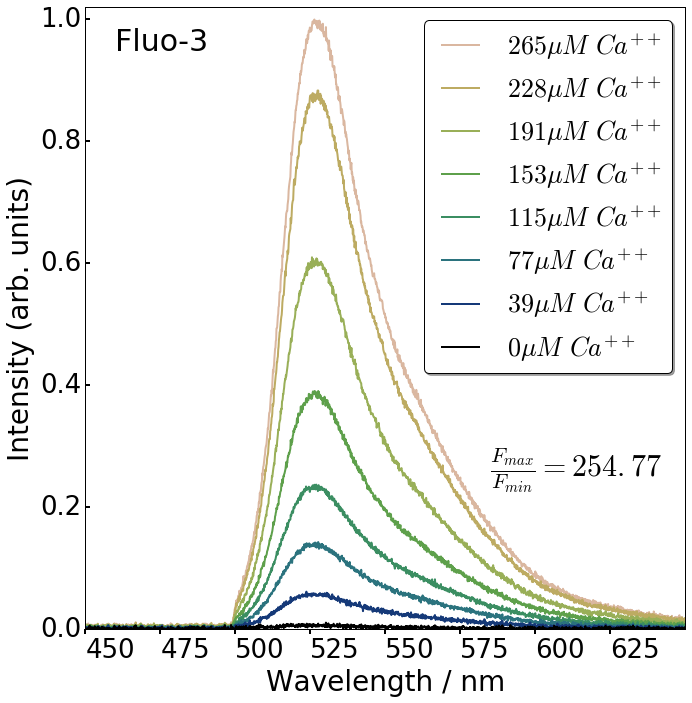

In [26]:
plt.figure(figsize=(10,10))
nor = max(dataf[7]['BS'])
plt.plot(dataf[7]['wave'],dataf[7]['BS']/nor,color=cm.gist_earth(70/80),label= r'$265 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[6]['wave'],dataf[6]['BS']/nor,color=cm.gist_earth(60/80),label= r'$228 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[5]['wave'],dataf[5]['BS']/nor,color=cm.gist_earth(50/80),label= r'$191 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[4]['wave'],dataf[4]['BS']/nor,color=cm.gist_earth(40/80),label= r'$153 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[3]['wave'],dataf[3]['BS']/nor,color=cm.gist_earth(30/80),label= r'$115 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[2]['wave'],dataf[2]['BS']/nor,color=cm.gist_earth(20/80),label= r'$77 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[1]['wave'],dataf[1]['BS']/nor,color=cm.gist_earth(10/80),label= r'$39 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[0]['wave'],dataf[0]['BS']/nor,color=cm.gist_earth(0/80),label= r'$0 \mu M$'+' $Ca^{++}$',linewidth=2)

plt.text(460, .95, 'Fluo-3', fontsize=30)
plt.text(585, .25, r'$\frac{F_{max}}{F_{min}} = 254.77$', fontsize=30)
plt.xlabel(r'Wavelength / nm', fontsize=28)
plt.ylabel('Intensity (arb. units)', fontsize=28)
#plt.title('Fluo-4 Calicum Induced Fluorescence', fontsize=32)
plt.legend(loc='upper right',fontsize=26,shadow=True, fancybox=True)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.xticks([450,475,500,525,550,575,600,625],ha='left')
plt.tick_params(top="off",right='off')
plt.tick_params(axis='x', direction='out',width=2,length=5)
plt.tick_params(axis='y',width=2,length=5)

plt.tight_layout()
plt.xlim(450,650)
plt.ylim(0,1.02)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/paper8-16/Ar_Fluo3_ca.pdf')
plt.show()

(490, 600)

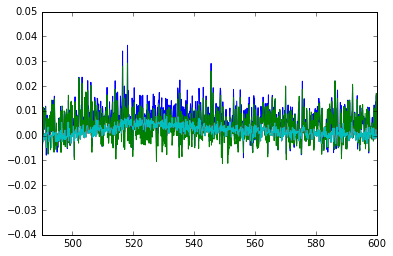

In [89]:
plt.plot(data[0]['wave'],data[0]['sig'])
plt.plot(water['wave'],water['sig'])
#plt.plot(dataf[0]['wave'],dataf[0]['BS'])
plt.plot(data[0]['wave'],data[0]['sig']-water['sig'])

plt.xlim(490,600)

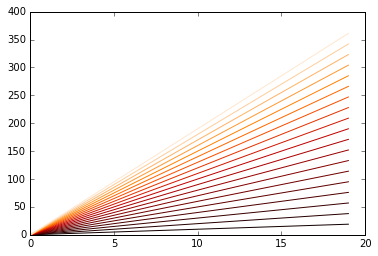

In [8]:
a = np.arange(0,20)

plt.figure()
for i in np.arange(20):
    c = cm.gist_heat(i/20)
    plt.plot(a,i*a,color=c)

plt.show()

In [20]:
inte = []
for a in range(0,15):
    inte.append(intensity[a])
inte
Fmax=max(inte)
Fmin=min(inte)
Fs = np.array((inte-Fmin)/(Fmax-inte))
Fs

array([  0.00000000e+00,   5.06072456e-02,   1.16193286e-01,
         1.54538356e-01,   2.38377103e-01,   3.52544804e-01,
         3.46557758e-01,   8.51713627e-01,   1.48806385e+00,
         3.82978325e+00,              inf,   1.11160860e+02,
         9.60963104e+01,   9.18612115e+01,   1.87979694e+01])

In [21]:
inte

[0.1297932567205613,
 1.9481062407954171,
 4.059299270235722,
 5.1825018629016375,
 7.3960034064682914,
 9.9689751271835654,
 9.8448864068151654,
 17.492446975743839,
 22.706280816466329,
 30.062285935065912,
 37.878000482996249,
 37.541446293433317,
 37.489229714327898,
 37.471499139756801,
 35.971329835350573]

In [21]:
xes = list(range(11))
bacon = []
for f in range(len(xes)):
    bacon.append((6.43e-3)*(3e-6)/(500e-6+(3e-6*xes[f])))
finalcon=np.array(np.cumsum(bacon)/1e-6)
finalcon = np.append(0,finalcon)
finalcon = finalcon[0:len(finalcon)-1]
finalcon

array([   0.        ,   38.58      ,   76.9299006 ,  115.05243024,
        152.95026914,  190.62605039,  228.08236107,  265.32174331,
        302.34669532,  339.15967242,  375.76308798])

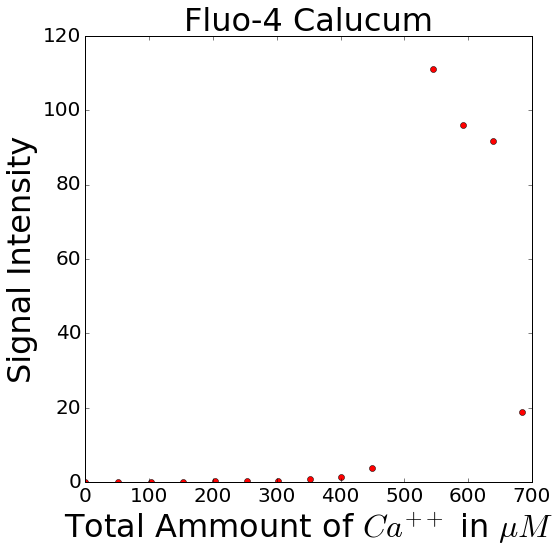

In [34]:
plt.figure(figsize=(8,8))
plt.plot(finalcon,Fs,'ro')
plt.xlabel(r'Total Ammount of $Ca^{++}$ in $\mu M$', fontsize=32)
plt.ylabel('Signal Intensity', fontsize=32)
plt.title('Fluo-4 Calucum', fontsize=32)
plt.tick_params(labelsize=20)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/Fluo4/Fluo4 Bakd.pdf')
plt.show()

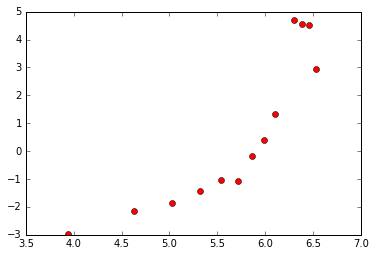

In [35]:
plt.plot(np.log(finalcon),np.log(Fs),'ro')

In [36]:
ys =np.log(Fs)
ys

array([       -inf, -2.98366052, -2.15250022, -1.86731295, -1.43390139,
       -1.04257756, -1.05970579, -0.16050493,  0.39747584,  1.34280821,
               inf,  4.71097834,  4.56535092,  4.52027887,  2.93374886])

In [56]:
ys =np.log(Fs)
ys = np.delete(ys,[0,10])
xs =np.log(finalcon)
xs = np.delete(xs,[0,10])
fit = np.polyfit(xs,ys,1)
fun = np.poly1d(fit)
kd = np.exp(fun[0])/1e-6
kd

0.050810870640516981

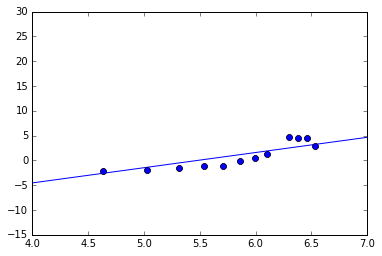

In [58]:
xvals = np.linspace(1.0, 15.0, num=500, endpoint=True)
plt.plot(xvals,(fun[1]*xvals+fun[0]))
plt.plot(np.log(finalcon),np.log(Fs),'ro')
plt.plot(xs,ys,'bo')

plt.xlim(4,7)
plt.show()

In [28]:
freeCa = kd*Fs
freeCa

array([  0.00000000e+00,   1.60197728e+00,   3.67810976e+00,
         4.89192669e+00,   7.54585037e+00,   1.11598401e+01,
         1.09703195e+01,   2.69610777e+01,   4.71048058e+01,
         1.21232161e+02,              inf,   3.51880782e+03,
         3.04193805e+03,   2.90787558e+03,   5.95051551e+02])